# This week we will focus on classification by using two datasets: 
   1) Breast cancer
   2) Diabetes

## Let's go ahead and implement logistic regression for these datasets (feel free to apply and test out different models).

Remember, logistic regression is a model used for classification. Classification models can be used for tasks like classifying flower species or image recognition. All of this of course depends on the availability and quality of your data. Logistic Regression has some advantages including

* Model training and predictions are relatively fast
* No tuning is usually needed for logistic regression unless you want to regularize your model. 
* Finally, it can perform well with a small number of observations. 


## Import Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

## Load the Dataset
The code below loads a modified version of the breast cancer dataset which has two classes. A 0 is benign and a 1 is malignant tumor. 

In [2]:
from sklearn import datasets

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df = sklearn_to_df(datasets.load_breast_cancer())
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.shape

In [ ]:
df.tail(10)

In [ ]:
# What are the attributes contained in the data set?

df.columns.values

In [3]:
# Checking for null values in the dataset
df.isnull().sum()
# an example to a perfect dataset. Not a common occurrence in the real world.

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [4]:
# let's get some data distribution information

df.describe()

# Benign = 0 (negative class)
# Malignant = 1 (positive class)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
#Return the dtypes in the DataFrame.
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

# Exploratory analysis and visualization

In [ ]:
# Let's generate a heat map
df.corr()

plt. figure(figsize=(20,8))
sns.heatmap(df.corr());


In [ ]:
# generate a scatter plot matrix with the "mean" columns
cols = ['target',
        'mean radius', 
        'mean texture', 
        'mean perimeter', 
        'mean area', 
        'mean smoothness', 
        'mean compactness', 
        'mean concavity',
        'mean concave points', 
        'mean symmetry', 
        'mean fractal dimension']

sns.pairplot(data=df[cols], hue='target', palette='RdBu') ;

There are some interesting patterns visible. For instance, the almost perfectly linear patterns between the radius, perimeter and area attributes are suggesting a presence of multicollinearity between these variables. Another set of variables that possibly imply multicollinearity are the concavity, concave_points and compactness.

In the coming up section, we will generate a matrix similar to the one above, but this time displaying the correlations between the variables instead of a scatter plot. Let's see if our hypothesis about the multicollinearity is backed up by any statistical evidence.


In [ ]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [ ]:
help(sns.heatmap)

Looking at the matrix, we can immediately verify the presence of multicollinearity between some of our variables. For instance, the mean radius column has a correlation of 1 and 0.99 with  mean perimeter and mean area columns, respectively. This is probably because the three columns essentially contain the same information, which is the physical size of the observation (the cell). Therefore we should only pick one of the three columns when we go into further analysis.

Another place where multicollinearity is apparent is between the "mean" columns and the "worst" column. For instance, the radius_mean column has a correlation of 0.97 with the radius_worst column. In fact, each of the 10 key attributes display very high (from 0.7 up to 0.97) correlations between its "mean" and "worst" columns. This is somewhat inevitable, because the "worst" columns are essentially just a subset of the "mean" columns; the "worst" columns are also the "mean" of some values (the three largest values among all observations). Therefore, we may want to discard the "worst" columns from our analysis and only focus on the "mean" columns.

In short, we will drop all "worst" columns from our dataset, then pick only one of the three attributes that describe the size of cells. But which one should we pick?

Let's quickly go back to 6th grade and review some geometry. If we think of a cell as roughly taking a form of a circle, then the formula for its radius is r. The formulae for its perimeter and area are then 2πr and πr2, respectively. As we can see, a cell's radius is the basic building block of its size. Therefore, I think it is reasonable to choose radius as our attribute to represent the size of a cell.

Similarly, it seems like there is multicollinearity between the attributes compactness, concavity, and concave points. Just like what we did with the size attributes, we should pick only one of these three attributes that contain information on the shape of the cell. Compactness is an attribute name that seems straightforward, so we will remove the other two attributes.

We will now go head and drop all unnecessary columns.


In [6]:
df = sklearn_to_df(datasets.load_breast_cancer())
df

# first, drop all "worst" columns
cols = ['worst radius', 
        'worst texture', 
        'worst perimeter', 
        'worst area', 
        'worst smoothness', 
        'worst compactness', 
        'worst concavity',
        'worst concave points', 
        'worst symmetry', 
        'worst fractal dimension']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['mean perimeter',
        'perimeter error', 
        'mean area', 
        'area error']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['mean concavity',
        'concavity error', 
        'mean concave points', 
        'concave points error']
df = df.drop(cols, axis=1)

# verify remaining columns
df.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension', 'radius error',
       'texture error', 'smoothness error', 'compactness error',
       'symmetry error', 'fractal dimension error', 'target'],
      dtype='object')

In [ ]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

In [7]:
dict = {0:'benign',1:'malignant'}
df['target'] = df['target'].replace(dict)
df

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,symmetry error,fractal dimension error,target
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193,benign
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532,benign
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571,benign
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208,benign
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239,benign
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498,benign
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892,benign
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.02324,0.006185,benign


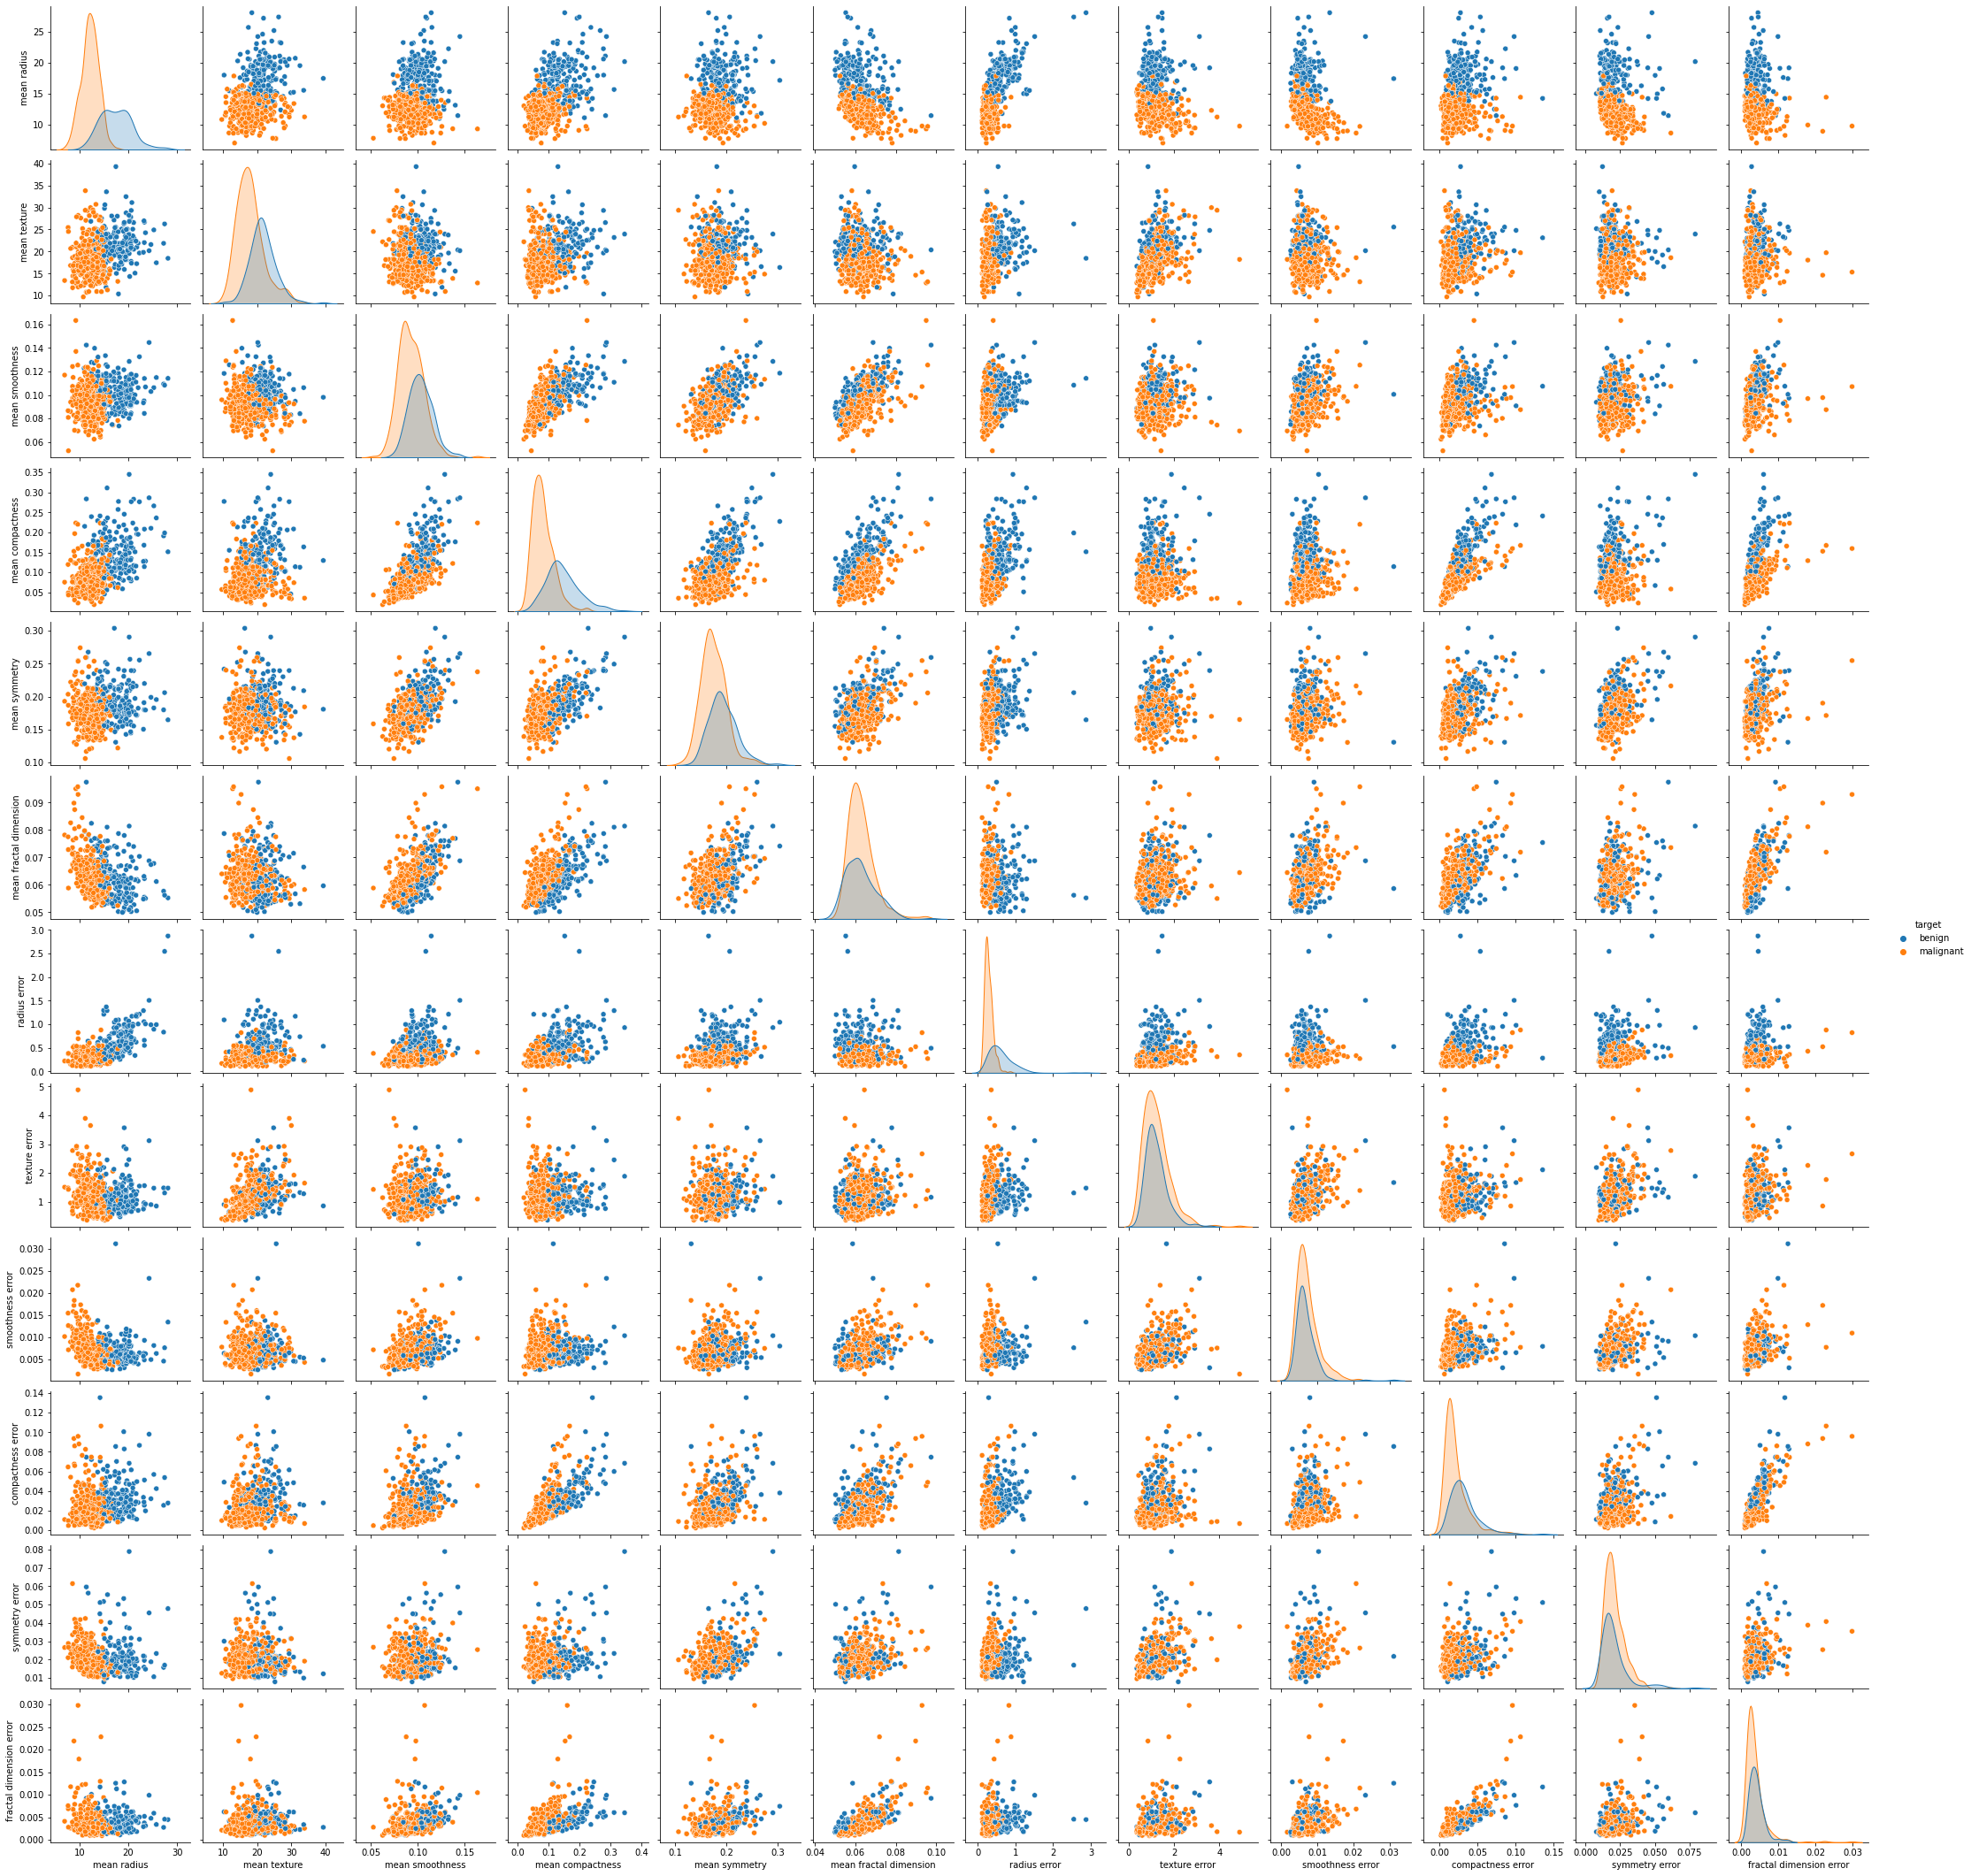

In [8]:
#Seaborn function is used here to automatically plot the different types of charts for pairs of attributes within the dataset 

sns.pairplot(df, hue="target");

## Splitting Data into Training and Test Sets

In [9]:
# let's pick an explanatory variable based on the seaborn plot
X_train, X_test, y_train, y_test = train_test_split(df[['mean compactness']], df['target'], random_state=2)

## Standardize the Data
Logistic Regression is effected by scale so you need to scale the features in the data before using Logistic Regresssion. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set.

In [10]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [ ]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.linear_model import LogisticRegression

<b>Step 2:</b> Make an instance of the Model

This is a place where we can tune the hyperparameters of a model. Typically this is where you tune C is related to regularization

In [11]:
clf = LogisticRegression()

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features mean compactness) and y (labels-which tumor type)

In [12]:
clf.fit(X_train, y_train)

LogisticRegression()

<b>Step 4:</b> Predict the labels of new data (new patient data)

Logistic regression also allows you to see prediction probabilities as well as  a prediction. This is not like other algorithms like decision trees for classification which only give you a prediction not a probability. 

In [13]:
# One observation's mean compactness after standardization
X_test[0].reshape(1,-1)

array([[-0.10696563]])

In [14]:
print('prediction', clf.predict(X_test[0].reshape(1,-1))[0]) #prediction for one patient sample
print('probability', clf.predict_proba(X_test[0].reshape(1,-1)))

prediction malignant
probability [[0.30045848 0.69954152]]


If this is unclear, let's visualize how logistic regression makes predictions by looking at our test data!

In [15]:
example_df = pd.DataFrame()
example_df.loc[:, 'mean compactness'] = X_test.reshape(-1)
example_df.loc[:, 'target'] = y_test.values
example_df['logistic_preds'] = pd.DataFrame(clf.predict_proba(X_test))[1]


In [16]:
example_df.head(10)

,mean compactness,target,logistic_preds
0,-0.106966,malignant,0.699542
1,-0.093839,malignant,0.694591
2,-0.942265,malignant,0.911881
3,3.353341,benign,0.004799
4,0.208661,malignant,0.569904
5,1.992383,benign,0.051957
6,0.212522,malignant,0.568213
7,-0.976434,malignant,0.916663
8,-0.700768,malignant,0.870519
9,-1.021799,malignant,0.922647


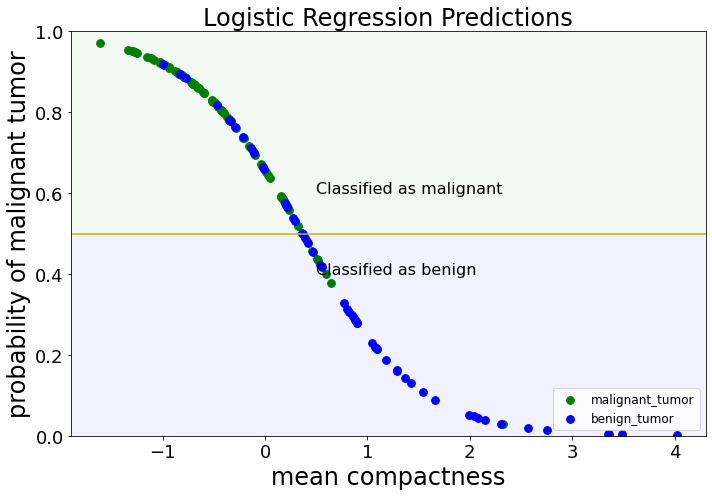

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

malignant_tumor = example_df['target'] == 'malignant'
benign_tumor = example_df['target'] == 'benign'

ax.scatter(example_df.loc[malignant_tumor, 'mean compactness'].values,
            example_df.loc[malignant_tumor, 'logistic_preds'].values,
           color = 'g',
           s = 60,
           label = 'malignant_tumor')

ax.scatter(example_df.loc[benign_tumor, 'mean compactness'].values,
            example_df.loc[benign_tumor, 'logistic_preds'].values,
           color = 'b',
           s = 60,
           label = 'benign_tumor')

ax.axhline(y = .5, c = 'y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.5, .6, 'Classified as malignant', fontsize = 16)
ax.text(0.5, .4, 'Classified as benign', fontsize = 16)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)
ax.tick_params(labelsize = 18)
ax.set_xlabel('mean compactness', fontsize = 24)
ax.set_ylabel('probability of malignant tumor', fontsize = 24)
ax.set_title('Logistic Regression Predictions', fontsize = 24)
fig.tight_layout()


## Measuring Model Performance

While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), let's keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on new data (test set)

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [18]:
score = clf.score(X_test, y_test)
print(score)

0.8041958041958042


In [19]:
score_train = clf.score(X_train, y_train)
print('training dataset accuracy: ', score_train)

training dataset accuracy:  0.795774647887324


Accuracy is one metric, but it doesn't say give much insight into what was wrong. Let's look at a confusion matrix

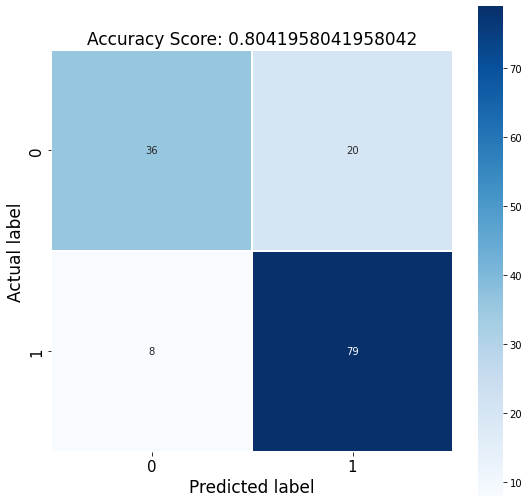

In [20]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

Let's look at the same information in a table in a clearer way. 

In [21]:
# ignore this code

modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        

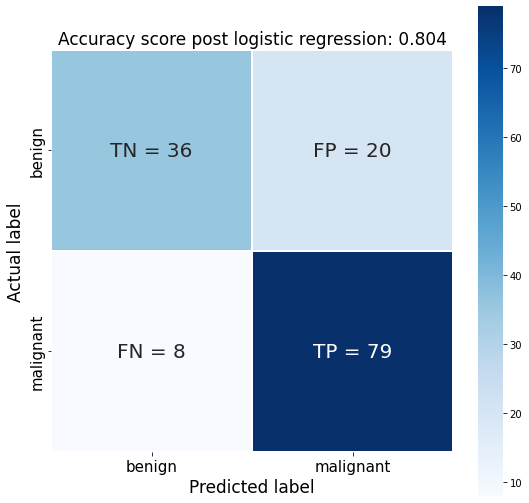

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['benign', 'malignant'],
            yticklabels = ['benign', 'malignant'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy score post logistic regression: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

In [26]:
#len(df.columns)
df.columns.value_counts()

fractal dimension error    1
radius error               1
smoothness error           1
mean symmetry              1
mean radius                1
compactness error          1
mean fractal dimension     1
mean smoothness            1
mean compactness           1
target                     1
symmetry error             1
texture error              1
mean texture               1
dtype: int64

In [27]:
df.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension', 'radius error',
       'texture error', 'smoothness error', 'compactness error',
       'symmetry error', 'fractal dimension error', 'target'],
      dtype='object')

## How about combining PCA and logistic regression?

In [23]:

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df['target'], random_state=2)

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = .90, random_state=2)),
                 ('logistic', LogisticRegression())])

pipe.fit(X_train, y_train)

# Get Model Performance
print(pipe.score(X_test, y_test))

0.9230769230769231


### Looks like PCA and logistic regression helped improve the accuracy drastically, though we selected all the variables in the latter case and only the 'mean compactness' in the previous case. 

In [28]:
# let's visualize the pipe
from sklearn import set_config

set_config(display='diagram')
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.9, random_state=2)),
                ('logistic', LogisticRegression())])

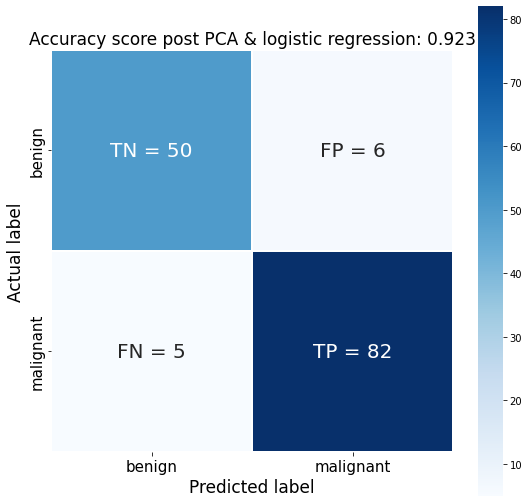

In [31]:
# Let's visualize the confusion matrix again

score = pipe.score(X_test, y_test)

cm = metrics.confusion_matrix(y_test, pipe.predict(X_test))

# ignore this code

modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['benign', 'malignant'],
            yticklabels = ['benign', 'malignant'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy score post PCA & logistic regression: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

I encourage you to try and create a logistic regression model of your own using other features in this dataset, such as the mean texture and mean symmetry. 